The demos in python will be built using numpy, math, and matplotlib.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

The function line2D solves for the decision boundary in 2D space drawn by a set of weights theta, and bias theta0.
Sigmoid does something very similar and draws a sigmoid across 1D data for a given theta and theta0.
simp_sigmoid is the basic sigmoid function: <br>
$
\begin{align}
\sigma(z) = \frac{1}{1-e^{-z}}
\end{align}
$ <br>
magnitude is the magnitude of any vector: <br>
$
\begin{align}
m(x) = \sqrt{\sum_{i=1}^n x_i^2}
\end{align}
$

In [3]:
def line2D(theta,theta0,x,ymin,ymax):
    if theta[1] == 0:
        y = np.linspace(ymin,ymax,len(x))
        x = -np.ones(len(x))*theta0/theta[0]
    else:
        y = - (theta[0]*x+theta0)/theta[1]
    return x,y

def sigmoid(theta,theta0,x):
    # plot a sigmoid based on theta, theta0, and x
    y = 1/(1+np.exp(theta*x+theta0))
    return y

def simp_sigmoid(x):
    return 1/(1+np.exp(-x))

def magnitude(x):
    return np.sqrt(np.sum(x**2))

functions made to plot data and lines in 1 and 2D. Plot data functions by itself but plot_sigmoid and plot_decision are
designed to be called within full_plot and full_sigmoid_plot.

In [4]:
def plot_data(data,labels):
    # initialize plot
    fig, ax = plt.subplots()

    #solve max and min and set limits
    xmax = np.max(data[0,:])
    xmin = np.min(data[0,:])
    ymax = np.max(data[1,:])
    ymin = np.min(data[1,:])
    ax.set_xlim(xmin-.61*np.abs(xmin),1.61*xmax)
    ax.set_ylim(ymin-.61*np.abs(ymin),1.61*ymax)

    #set color and marker type for plot
    colors = ['b','g','r']
    markers = ['v','+','_']

    #set spines for bold axes
    ax.spines['left'].set_color('black')
    ax.yaxis.tick_left()

    ax.spines['right'].set_color('none')

    ax.spines['bottom'].set_color('black')
    ax.xaxis.tick_bottom()

    ax.spines['top'].set_color('none')

    #set aspect ratio of units equal
    ax.set_aspect('equal')

    #plot the individual markers
    for i,yi in enumerate(labels):
        ax.scatter(data[0,i],data[1,i],color=colors[yi],marker=markers[yi])

    # set the grid
    ax.grid(zorder=-1.0)
    ax.set_axisbelow(True)

    return ax

def plot_sigmoid(theta,theta0,ax):
    #plot a sigmoid in 2D across 1D data

    # get the max and min of the axes
    xmin,xmax = ax.get_xlim()

    # calculate the sigmoid
    x = np.linspace(xmin,xmax,11)
    y = sigmoid(theta,theta0,x)

    #set the ymin and max
    ymax = np.max(y)
    ymin = np.min(y)
    print(ymin)
    print(ymax)
    ax.set_ylim(-1,2)

    #plot the sigmoid
    ax.plot(x,y)

    return ax

def plot_decision(theta,theta0,ax):

    # make the unit vector in the direction of the weights
    unit_theta = theta/magnitude(theta)

    #get the max and min of the axes
    xmin,xmax = ax.get_xlim()
    ymin,ymax = ax.get_ylim()

    # plot the boundary
    x = np.linspace(xmin,xmax,11)
    x,y = line2D(theta,theta0,x,ymin,ymax)
    ax.plot(x,y)

    # plot the norm to the boundary
    normx = [x[5],unit_theta[0]+x[5]]
    normy = [y[5],unit_theta[1]+y[5]]
    ax.plot(normx,normy)

    return ax

def full_plot(data,labels,theta,theta0):
    #first plot the data
    ax = plot_data(data,labels)

    #plot the boundary
    ax = plot_decision(theta,theta0,ax)

    return ax

def full_sigmoid_plot(data,labels,theta,theta0):
    #first plot the data
    ax = plot_data(data,labels)

    #plot the boundary
    ax = plot_sigmoid(theta,theta0,ax)

    return ax

not actually necessary for any of the demonstrations but this is one zero loss for the perceptron model: <br>
$
\begin{align}
\sum_{i=1}^n \begin{cases} 1 ~ \text{if} ~ g_i \neq y_i\\ 0~\text{if}~g_i=y_i \end{cases}
\end{align}
$

In [5]:
def score(labels, preds):
    # the score returned is the elementwise comparison of two numpy vectors, if
    # all the values are predicted correctly the score should be zero
    return np.sum(labels!=preds)

This is a single perceptron:
```
th = [0,0]^T
th0 = 0
for k = 1 to K:
    for i = 1 to n:
        if y[i](dot(th^T,x[i]) + th0) <= 0:
            th = th + y[i]x[i]
            th0 = th0 + y[i]
return th, th0
```
and my implementation for this psuedo code in python is below. Data is x and its dimensions are dxn. Labels are my y
and it has dimensions of 1xn. epochs is the number of times that my code should iterate through the complete dataset.
Lastly if plot is given the function full_plot it will plot the data and a decision boundary for every update of th
and th0. <br>
One thing to note is that there is an error flag and if it remains false through any single complete iteration over the
dataset then the perceptron algorithim won't make any more updates and the code will end the loop.

In [6]:
def perceptron(data, labels, epochs,plot=None):
    # initialize th and th0 as 0
    th = np.zeros(np.size(data,axis=0))
    th0 = 0

    # start the algorithim
    for e in range(epochs):
        error = False
        for i in range(np.size(data,axis=1)):
            if labels[i]*(data[:,i].dot(th)+th0) <= 0:
                error = True
                th = th + labels[i]*data[:,i]
                th0 = th0 + labels[i]
                if plot:
                    ax = plot(data,labels,th,th0)
                    plt.show()
                    plt.close()
            else:
                continue
        if error == False:
            break
    return th,th0

These are fairly simple datasets that when called will return a dataset and its corresponding labels as two variables.
Simply call the function and plug data into the data variable and labels into the labels variable of a correct function
and it should work. The simple 1D data should be used with the full_plot_sigmoid and the others are ok with the normal
full_plot and perceptron and NLL_minimize functions.

In [19]:
def simple_1D():
    data = np.array([[3,4,1,2,2.5],
                     [0,0,0,0,0]])
    labels = np.array([1,1,-1,-1,0])
    return  data, labels

def simple_separable():
    data = np.array([[1,1,-1,-1],
                     [1,-1,1,-1]])
    labels = np.array([1,-1,-1,-1])
    return  data, labels

def less_simple():
    # need to change this example to something simpler
    data = np.array([[1,1,1,2,3,4],
                     [1,2,3,5,4,3]])
    labels = np.array([-1,-1,-1,1,1,1])
    return data, labels

def extreme():
    data = np.array([[4.3,3.5,2,1,2,3,3,4],
                     [1.5,2,3,4,3.7,3,3.5,3]])
    labels = np.array([-1,-1,-1,-1,1,1,1,1])
    return data,labels

def not_linear():
    data = np.array([[1,1,-1,-1,-.5],
                     [1,-1,1,-1,-.5]])
    labels = np.array([1,-1,-1,-1,1])
    return  data, labels

negative log likliehood is written as: <br>
$
\begin{align}
-\sum_{i=1}^n y_i\log{(a_i)}+(i-y_i)\log{(1-a_i)}
\end{align}
$ <br>
where, $a_i$, is the output of the sigmoid function.NLL is the
internal part of the sum and NLL_obj is a wrapper for NLL that
takes a sum of the resultant vector.
The derivative of the sigmoid function is: <br>
$
\begin{align}
\sigma'(z) = \frac{e^{-z}}{(1-e^{-z})^2}
\end{align}
$ <br>
which can also be written as: <br>
$
\begin{align}
\sigma'(z)=\sigma(z) \cdot (1-\sigma(z))
\end{align}
$ <br>
using this info it is possible to take the derivative of NLL w.r.t the weights: <br>
$
\begin{align}
\frac{dNLL}{d\theta} = \sum_{i=1}^n x_i(a_i-y_i)
\end{align}
$ <br>
$
\begin{align}
\frac{dNLL}{d\theta_0} = \sum_{i=1}^n (a_i-y_i)
\end{align}
$
d_NLL_obj_th and d_NLL_obj_th0 are functions that calculate these
derivatives and d_NLL_obj is a wrapper that returns both.

In [8]:
def NLL(x,y,th,th0):
    return y*np.log(simp_sigmoid(th.T.dot(x)+th0))+(1-y)*np.log(simp_sigmoid(th.T.dot(x)+th0))

def NLL_obj(x,y,th,th0):
    return -np.sum(NLL(x,y,th,th0))

def d_NLL_obj_th(x,y,th,th0):
    return np.sum(np.multiply(x,(simp_sigmoid(th.T.dot(x)+th0)-y)),axis=1)

def d_NLL_obj_th0(x,y,th,th0):
    return np.sum(simp_sigmoid(th.T.dot(x)+th0)-y)

def d_NLL_obj(x,y,th,th0):
    return d_NLL_obj_th(x,y,th,th0), d_NLL_obj_th0(x,y,th,th0)

gradient descent is implemented below using the pseudo code, the only difference
being that the implemented function now also updates theta0:
```
th = th_init; t=0
while
	t = t+1
	th[t] = th[t-1] - η f’(θ(t-1))
	if |f(θ(t))-f(θ(t-1))| < conv:
		break
	if t > max_t:
	    break
return θ(t)
```
Additionally the gradient descent function also returns a list of all previous
function values, theta values, and theta0 values. The inputs f and df only take \
in values theta and theta0 and can be wrappers for your true objective function
meaning that the gd function itself is universal. The specific function for NLL
is NLL_minimize which initialize theta and theta0 and creates the wrappers for
NLL_obj and d_NLL_obj.

In [27]:
def gd(f, df, th, th0, step_size, max_iter):
    prev_th = th
    prev_th0 = th0
    fs = []; ths = []; th0s = []
    for i in range(max_iter):
        prev_f = f(prev_th,prev_th0)
        prev_thgrad, prev_th0grad = df(prev_th,prev_th0)
        fs.append(prev_f); ths.append(prev_th); th0s.append(prev_th0)
        if i == max_iter-1:
            return prev_th,prev_th0,fs,ths,th0s
        prev_th = prev_th - step_size*prev_thgrad
        prev_th0 = prev_th0 - step_size*prev_th0grad

def NLL_minimize(x,y,step_size,epochs):
    th = np.zeros(2).T
    th0 = 0

    def f(th,th0):
        return NLL_obj(x,y,th,th0)

    def df(th,th0):
        return d_NLL_obj(x,y,th,th0)

    th, th0, fs, ths, th0s = gd(f,df,th,th0,step_size,epochs)
    return th,th0,fs,ths,th0s

The first example is simple. four points evenly spaced around zero. Using the
perceptron the solution is found in three updates. The plot with theta and thet0
in their inital values would just be the data points because there is no line to plot.
Therefore, the plots start after the first update.

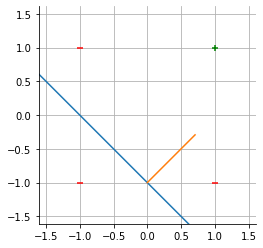

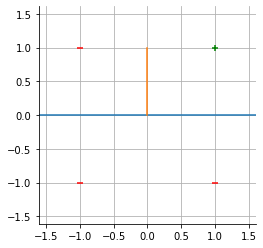

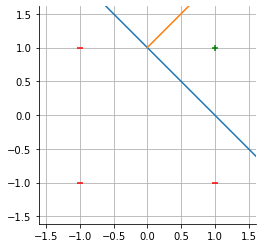

In [10]:
data, labels = simple_separable()
th, th0 = perceptron(data,labels,10,full_plot)

this next case is still linerally seperable but takes many more updates than
the previous data set. Also, notice that if you run the percepton code for more
itrerations, the boundary will never change because all of the labels are predicted
correctly. The algorithim doesn't know what to do to make the answer more correct.


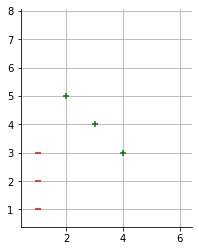

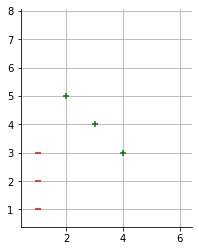

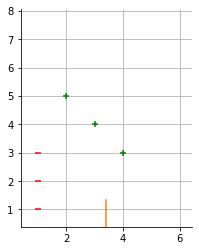

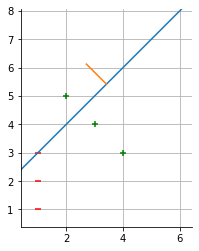

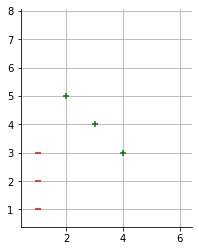

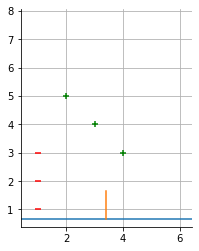

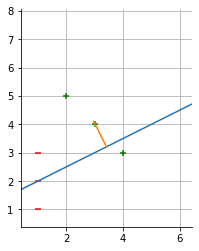

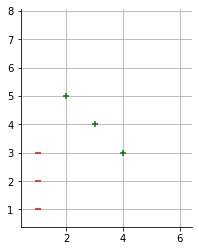

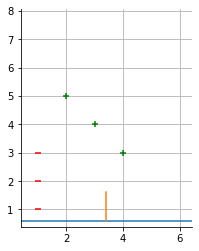

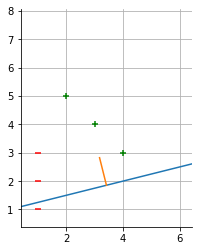

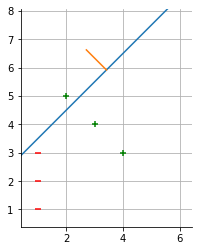

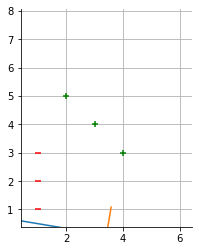

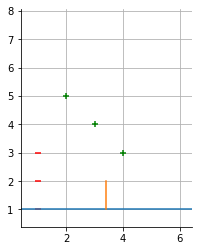

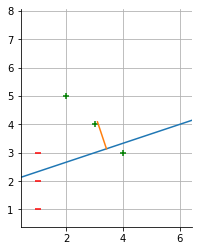

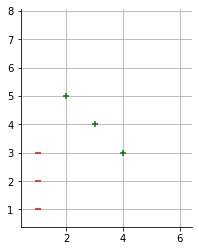

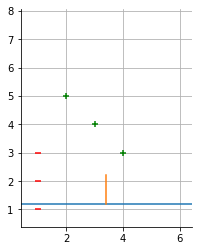

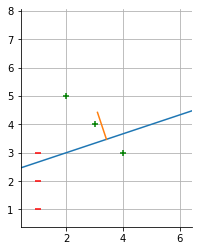

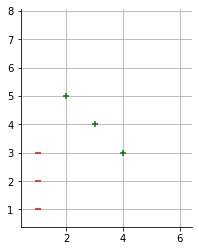

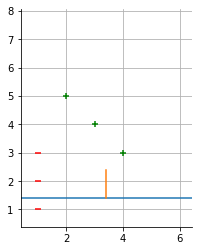

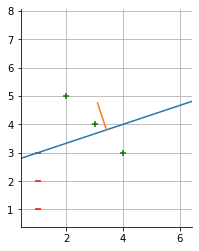

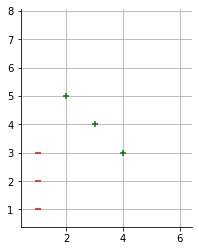

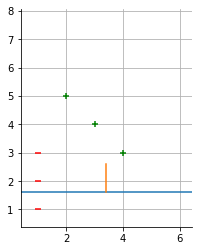

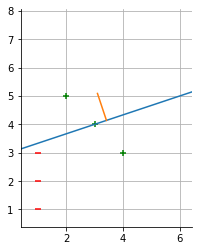

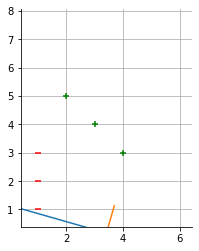

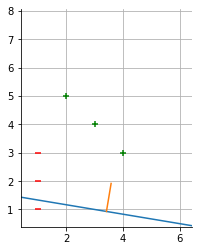

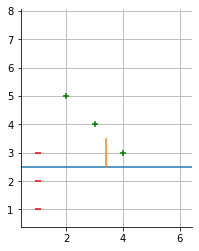

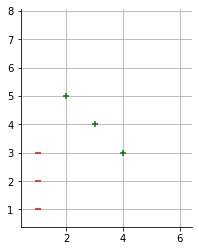

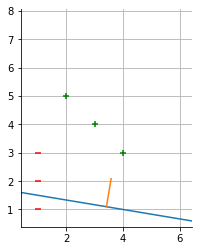

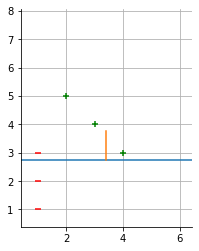

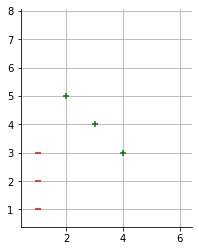

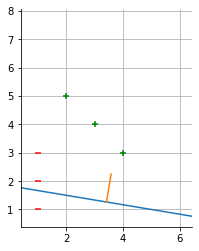

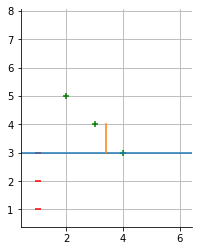

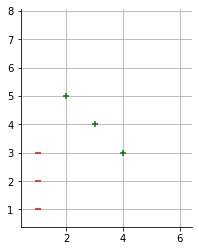

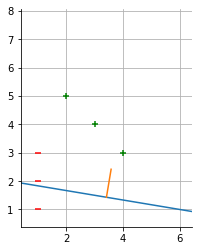

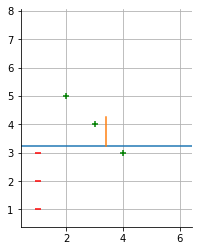

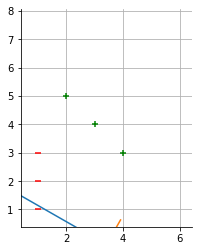

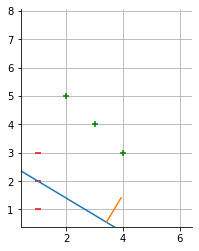

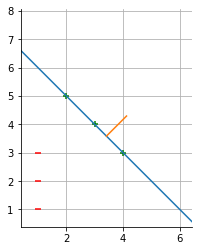

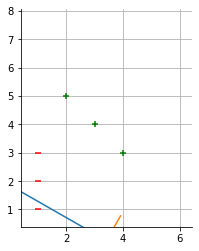

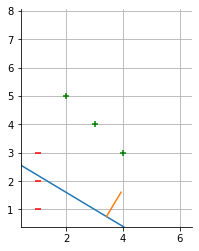

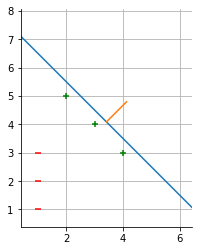

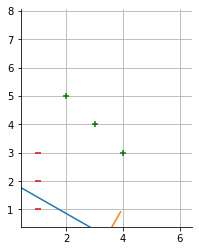

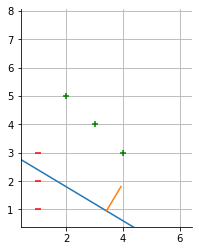

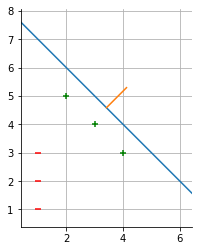

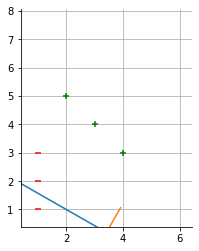

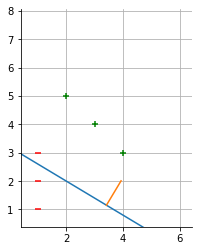

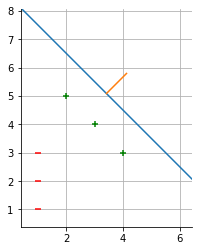

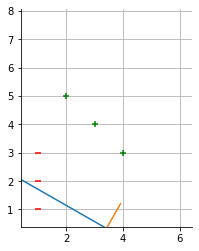

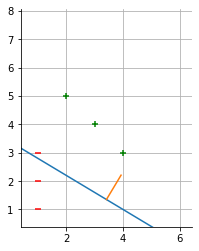

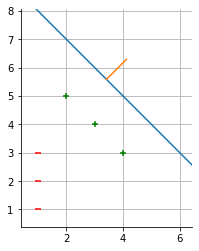

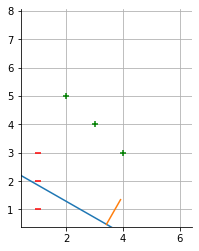

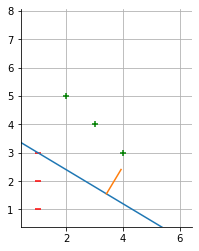

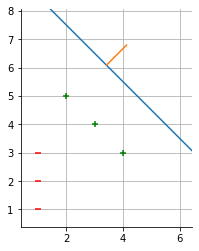

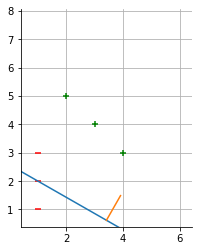

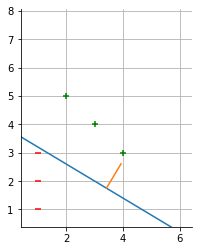

In [22]:
data,labels = less_simple()
th, th0 = perceptron(data,labels,20,full_plot)

In the next demo the lables need to be changed from -1 and 1 to 0 and 1 because
NLL is designed for 0 and 1 labels. This is achieved with the np.where() function.
You may want to change the stepsize and epoch to see how these change the rate at which
the gradient descent converges. At the extremes of stepsize the lkine will either
not move, or won't appear because it is taking steps away from the optimum.
The main take away of the NLL_minimize plot with .1 stepsize and 1000 epochs is
the fact that is draws an arguablly better decision boundary than the perceprton
did previously.

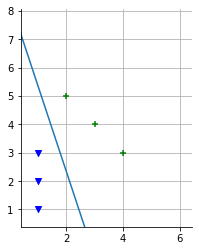

In [28]:
data, labels = less_simple()
labels = np.where(labels==-1,0,labels)
th,th0,fs,ths,th0s = NLL_minimize(data,labels,.1,1000)
ax = full_plot(data,labels,th,th0)
plt.show()

you can play with the extreme dataset, albeit, it's rather more mild than the name
would imply. Or, you can insert your own datasets and try to break NLL_minimize, which
is rather easy. Either way the demos are simple and small so that you can see what
is happening under the hood.
